# Logistic Regression Model
## Data Preperation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filepath for CSV file with matchup data
filename = 'data/full-22-23-matchups.csv'

df = pd.read_csv(filename)

X = df.drop(['Outcome', 'Game ID', 'Date', 'Home Team', 'Away Team'], axis=1)
y = df['Outcome']
ids = df['Game ID']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X_scaled, y, ids, test_size=0.2, shuffle=True)


## Create model with sklearn and make predictions

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

## Print out Accuracy, Confusion Matrix

In [3]:
print('\nAccuracy:', accuracy)
print(f'Confusion matrix:\n{conf_matrix[0]}\n{conf_matrix[1]}')


Accuracy: 0.6498054474708171
Confusion matrix:
[48 64]
[ 26 119]


## Display coefficients

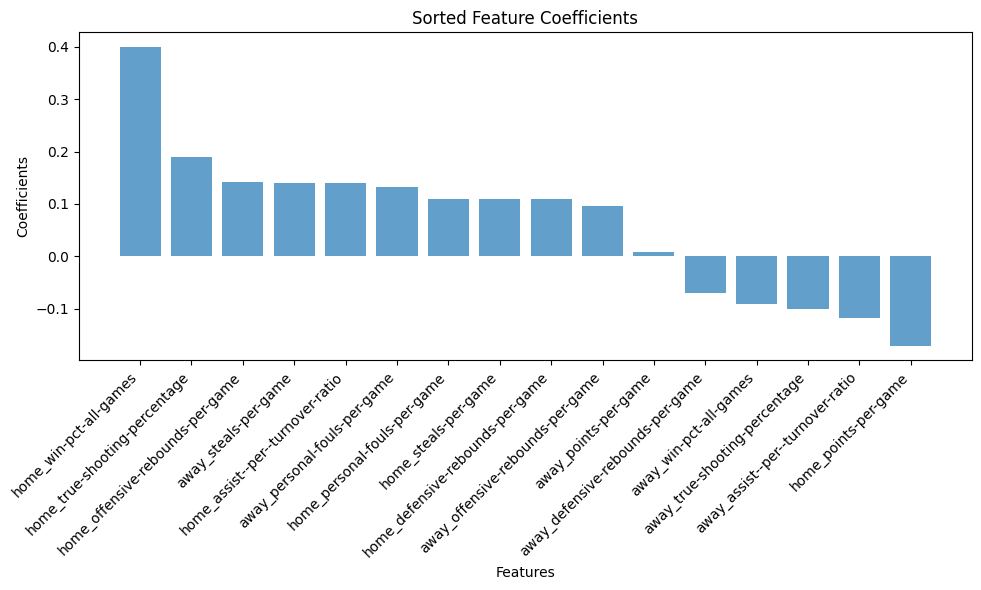

In [7]:
import matplotlib.pyplot as plt

# Sort the coefficients and labels together based on coefficients
coef = model.coef_[0]
sorted_data = sorted(zip(coef, X.columns), reverse=True)
sorted_coef, sorted_labels = zip(*sorted_data)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coef)), sorted_coef, align='center', alpha=0.7)
plt.xticks(range(len(sorted_coef)), sorted_labels, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Sorted Feature Coefficients')
plt.tight_layout()

# Show the plot
plt.show()

## ROC Curve (Receiver Operating Characteristic)

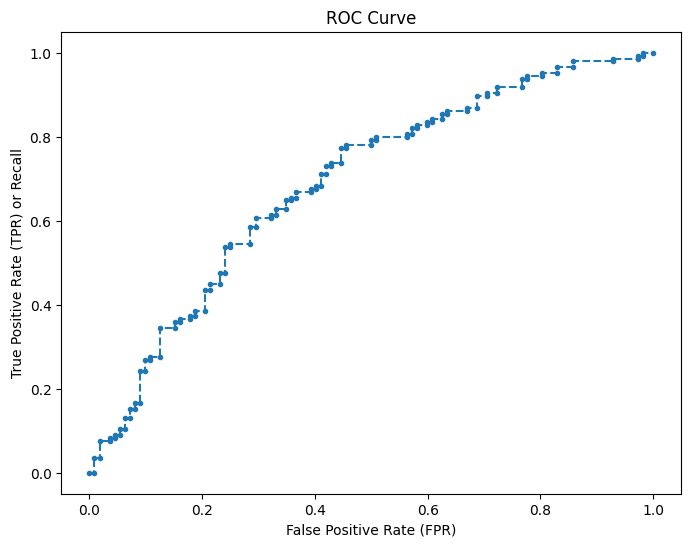

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', marker='.')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.show()

In [10]:
# AUC-ROC score: 0.5 -> Random Classifier, 1.0 -> Perfect Classifier
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {auc}')

AUC-ROC Score: 0.6892857142857144
